In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

class DeGrootModel:
    def __init__(self, number_of_nodes, edge_probability, seed=None):
        """
        Initializes the DeGroot Model with a random graph and random initial opinions.

        :param number_of_nodes: Number of nodes in the graph.
        :param edge_probability: Probability of edge creation.
        :param seed: Random seed for reproducibility.
        """
        self.number_of_nodes = number_of_nodes
        self.edge_probability = edge_probability
        self.graph = nx.erdos_renyi_graph(n=number_of_nodes, p=edge_probability, seed=seed)
        self.opinions = np.random.rand(number_of_nodes)

    def update_opinions(self):
        """
        Update the opinions of the individuals in the network based on the DeGroot model.
        """
        new_opinions = np.zeros(self.number_of_nodes)
        for i in self.graph.nodes():
            neighbors = list(self.graph.neighbors(i))
            # Include the node's own opinion in the average
            total_opinions = self.opinions[i]
            for neighbor in neighbors:
                total_opinions += self.opinions[neighbor]
            new_opinions[i] = total_opinions / (len(neighbors) + 1)
        self.opinions = new_opinions

    def simulate(self, max_iterations=100, tolerance=1e-3):
        """
        Simulate the DeGroot model until opinions converge or the maximum number of iterations is reached.

        :param max_iterations: Maximum number of iterations to simulate.
        :param tolerance: Tolerance to determine convergence.
        """
        for _ in range(max_iterations):
            old_opinions = self.opinions.copy()
            self.update_opinions()
            diff = np.abs(self.opinions - old_opinions)
            if np.all(diff < tolerance):
                break

    def plot_network(self):
        """
        Plot the network with nodes colored by their opinion.
        """
        plt.figure(figsize=(8, 6))
        nx.draw(self.graph, node_color=self.opinions, with_labels=True, cmap=plt.cm.viridis)
        plt.title('Network with Node Opinions')
        plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label='Opinion')
        plt.show()

    def get_opinions(self):
        """
        Get the current opinions of the individuals in the network.

        :return: Numpy array of opinions.
        """
        return self.opinions


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

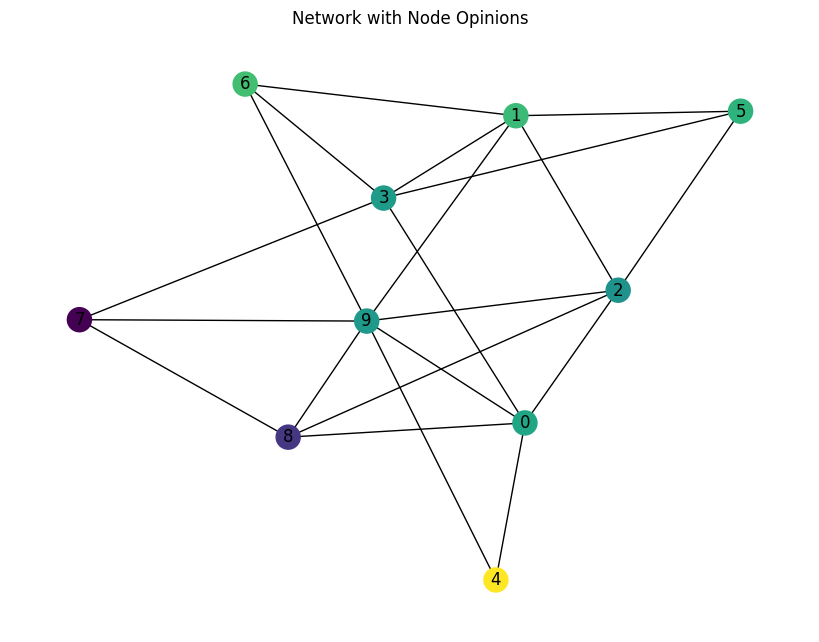

In [2]:
# Create an instance of the DeGrootModel
deGroot_simulation = DeGrootModel(number_of_nodes=10, edge_probability=0.5, seed=42)

# Simulate the model
deGroot_simulation.simulate()

# Get the final opinions
final_opinions = deGroot_simulation.get_opinions()

# Plot the network
deGroot_simulation.plot_network()